In [135]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from Signal_Analysis.features.signal import get_HNR
from scipy import signal
from audiostretchy.stretch import stretch_audio
import pandas as pd
import seaborn as sns
import os

# tools work in progress
import tools

reload(tools)

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

## audio, labels, speech recognition

0 i ------------------- from 0.3000 to 0.4200 sec, confidence: 100.00%
1 skymningen ---------- from 0.4200 to 1.2600 sec, confidence: 100.00%
2 en ------------------ from 1.3500 to 1.5000 sec, confidence: 100.00%
3 mycket -------------- from 1.5000 to 1.8000 sec, confidence: 100.00%
4 het ----------------- from 1.8300 to 2.1000 sec, confidence: 100.00%
5 dag ----------------- from 2.1000 to 2.4300 sec, confidence: 100.00%
6 i ------------------- from 2.4300 to 2.5200 sec, confidence: 100.00%
7 början -------------- from 2.5200 to 2.7900 sec, confidence: 100.00%
8 av ------------------ from 2.7900 to 2.9100 sec, confidence: 100.00%
9 juli ---------------- from 2.9100 to 3.3600 sec, confidence: 100.00%
10 lämnade ------------- from 3.3600 to 3.9900 sec, confidence: 100.00%
11 en ------------------ from 3.9900 to 4.1400 sec, confidence: 100.00%
12 ung ----------------- from 4.1400 to 4.4100 sec, confidence: 100.00%
13 man ----------------- from 4.4100 to 4.6800 sec, confidence: 100.00%
14

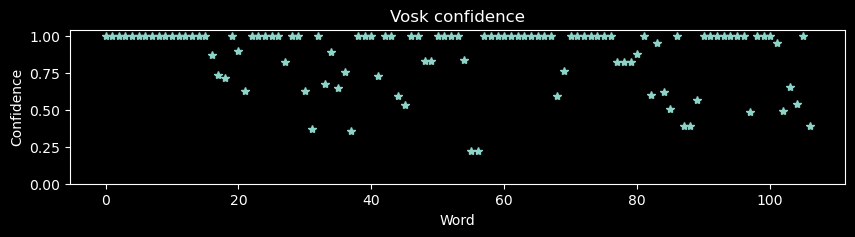

67 107 0.6261682242990654


In [136]:
labels_path = (
    "example_speech_Andreas/180923214834-Y20UOTIE-text-000_vowels_timestamp_manual.csv"
)
# labels_path = "wav_examples/digitala_vowels_manual_timestamps.csv"

labels_df = pd.read_csv(labels_path)
audio_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"
# audio_path = "wav_examples/digitala_resurser_sv.wav"
# audio_path = "audio_preproc/digitala_trash2_pp.wav"

Fs, audio = wavfile.read(audio_path)
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"

if "model" not in locals():
    model = Model(model_path)

words = tools.rec_vosk(audio_path, model, print_summary=True)

text = " ".join([w["word"] for w in words])

# get all vowels
for w in words:
    w["vowels"] = tools.checkVowels(w["word"], tools.VOWELS_SV)


print(text)
plt.figure(figsize=(10, 2))
plt.plot([w["conf"] for w in words], "*")
plt.title("Vosk confidence")
plt.xlabel("Word")
plt.ylabel("Confidence")
plt.ylim(bottom=0)
plt.savefig("figures/voskconf.svg")
plt.show()

wavfile.write("test.wav", Fs, tools.wavScaler(audio[int(1.5 * Fs) : int(1.8 * Fs)]))

conf100 = sum([w["conf"] == 1 for w in words])
print(conf100, len(words), conf100 / len(words))

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]


total found vowels: 38
unique start points: 38
unique stop points: 38


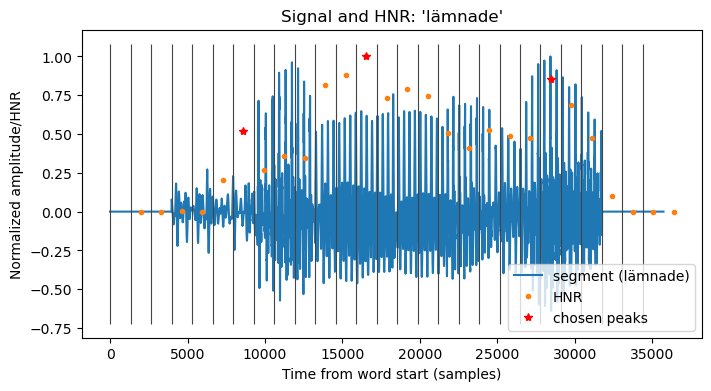

In [137]:
reload(tools)
plt.style.use("default")
# plt.style.use("default")
test = "lämnade"

add_context = False
fl = int(0.03 * Fs)
plt.figure(figsize=(8, 4))
grouped_frames = tools.extract_vowels(
    words,
    audio,
    Fs,
    fl,
    plot_word=test,
    print_info=False,
)
starts_all, stops_all, _, _ = tools.groupedframes_to_lists(grouped_frames)
plt.savefig("figures/exampleword_bad_light.svg", dpi=600)
plt.show()

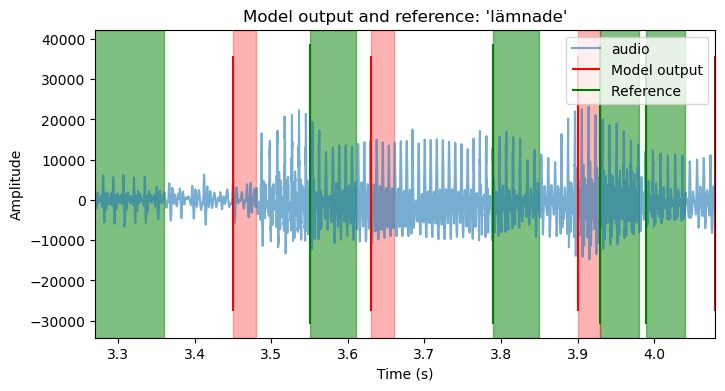

found vowels:


,Vosk found,Model output (count),Model output %
Vowel,,,
a,47,13,27.66\%
e,37,9,24.324\%
i,23,5,21.739\%
o,18,5,27.778\%
u,10,2,20.0\%
y,5,0,0.0\%
ä,8,3,37.5\%
å,8,0,0.0\%
ö,9,1,11.111\%


\begin{tabular}{lrrl}
\toprule
 & Vosk found & Model output (count) & Model output % \\
Vowel &  &  &  \\
\midrule
a & 47 & 13 & 27.66\% \\
e & 37 & 9 & 24.324\% \\
i & 23 & 5 & 21.739\% \\
o & 18 & 5 & 27.778\% \\
u & 10 & 2 & 20.0\% \\
y & 5 & 0 & 0.0\% \\
ä & 8 & 3 & 37.5\% \\
å & 8 & 0 & 0.0\% \\
ö & 9 & 1 & 11.111\% \\
\bottomrule
\end{tabular}

total: vowels in text 165
37
5
10
23
18
8
47
9
8


In [151]:
words_str = [w["word"] for w in words]

# find vosk timestamps
idx = words_str.index(test)

start, stop = words[idx]["start"], words[idx]["end"]

plt.figure(figsize=(8, 4))
tools.plot_intervals(audio, starts_all, stops_all, labels_df, Fs)
tr = (0, len(audio) / Fs)
tr = (start - 3 * fl / Fs, stop + 3 * fl / Fs)

plt.xlim(*tr)
plt.legend(loc="upper right")
plt.title(f"Model output and reference: '{test}'")
plt.savefig("figures/exampleword_bad_output_light.svg", dpi=600)

plt.show()


vowels_in_text = {v: 0 for v in tools.VOWELS_SV}
for c in tools.checkVowels(text, tools.VOWELS_SV):
    vowels_in_text[c] += 1

rows = []
print("found vowels:")
for v in grouped_frames.keys():
    rows.append(
        [
            v,
            vowels_in_text[v],
            len(grouped_frames[v]["frame"]),
            str(
                round(
                    100 * len(grouped_frames[v]["frame"]) / max(vowels_in_text[v], 1), 3
                )
            )
            + r"\%",
        ]
    )
df_info = pd.DataFrame.from_records(
    rows, columns=["Vowel", "Vosk found", "Model output (count)", "Model output %"]
)
df_info.set_index("Vowel", inplace=True)
df_info.sort_index(inplace=True)
display(df_info)
print(df_info.to_latex())
print("total: vowels in text", sum([vowels_in_text[v] for v in vowels_in_text.keys()]))
for v in vowels_in_text.keys():
    print(vowels_in_text[v])


(False, 0.20697385245883163)
(False, 0.29911590782389613)


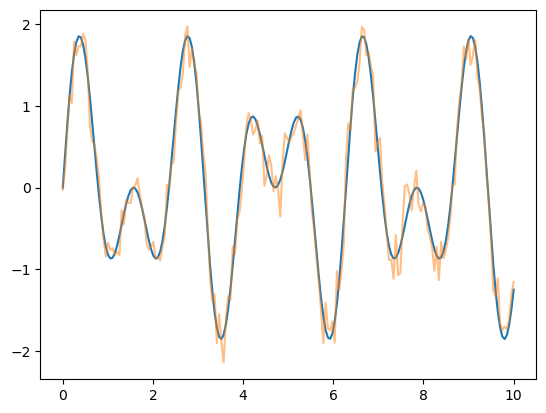

In [139]:
xx = np.linspace(0, 10, 200)
rng = np.random.default_rng()
y = np.sin(5 * xx) + np.sin(3 * xx)
e = y + 0.2 * rng.normal(size=len(xx))
print(tools.checkIfWhite(y))
print(tools.checkIfWhite(e))

plt.figure()
plt.plot(xx, y)
plt.plot(xx, e, alpha=0.5)


In [140]:
grouped_frames["ä"]["origin_word"]

['lämnade', 'värdinnan', 'när']

In [141]:
reload(tools)
p, r, error_words = tools.score_vs_labels(
    grouped_frames, labels_df, accept_partial=True
)

id = os.path.split(audio_path)[-1][:-4]
tools.groupedframes_to_files(
    grouped_frames, Fs, id, clear_folder=True, metadata={"origin_file": audio_path}
)

Classification errors:
- at 1.44s: MISS classed as e, word: en
- at 3.45s: MISS classed as ä, word: lämnade
- at 3.63s: MISS classed as a, word: lämnade
- at 4.08s: MISS classed as e, word: en
- at 4.92s: MISS classed as a, word: kammare
- at 5.19s: MISS classed as a, word: kammare
- at 6.51s: MISS classed as i, word: vid
- at 19.5s: MISS classed as u, word: under
- at 19.86s: MISS classed as e, word: den
- at 19.98s: MISS classed as ö, word: höga
- at 20.16s: MISS classed as a, word: höga
- at 25.14s: MISS classed as a, word: bostad
- at 27.33s: MISS classed as i, word: värdinnan
- at 27.54s: MISS classed as a, word: värdinnan
- at 28.98s: MISS classed as i, word: vind
- at 32.31s: MISS classed as i, word: middag
- at 35.65238095238095s: MISS classed as e, word: en
- at 43.38s: MISS classed as a, word: alltid
------------------------------
precision: 52.632% (20/38)
recall: 17.391% (20/115)


## Error analysis

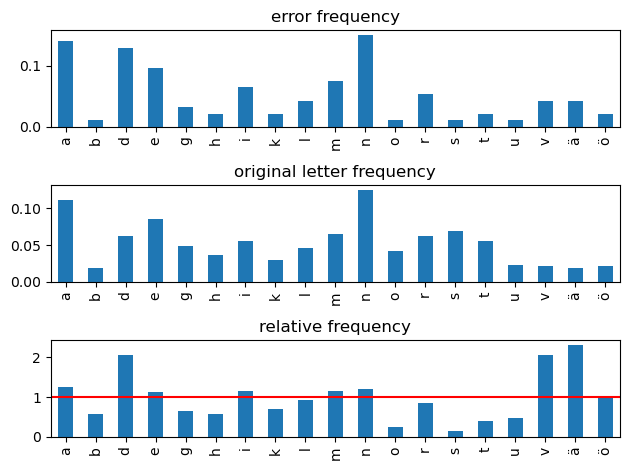

In [ ]:
error_letters = list("".join((error_words)))

all_letters = [x for x in list("".join(text.split())) if x in error_letters]
error_counts = (
    pd.Series(error_letters).sort_values().value_counts(normalize=True, sort=False)
)
all_counts = (
    pd.Series(all_letters).sort_values().value_counts(normalize=True, sort=False)
)
error_ratio = error_counts / all_counts
plt.style.use("default")
plt.figure()
plt.subplot(311)
error_counts.plot(kind="bar")
plt.title("error frequency")
plt.subplot(312)
all_counts.plot(kind="bar")
plt.title("original letter frequency")
plt.subplot(313)
error_ratio.plot(kind="bar")
plt.title("relative frequency")
plt.axhline(1, color="r")
plt.tight_layout()
plt.savefig("figures/error_letters_light.eps", dpi=600)
plt.show()

In [ ]:
print(len(audio) / Fs, "seconds")

45.09315192743764 seconds


In [ ]:
display(labels_df)

,vowel,tmin,tmax
0,i,0.10,0.35
1,y,0.65,0.75
2,i,0.85,0.95
3,e,0.95,1.05
4,e,1.20,1.40
...,...,...,...
110,ä,40.16,40.28
111,i,40.42,40.50
112,a,40.66,40.75
113,a,43.25,43.37


In [ ]:
for i in range(len(labels_df["tmin"]) - 1):
    if labels_df["tmax"][i] > labels_df["tmin"][i + 1]:
        print(labels_df.iloc[i])

# Optimize

In [ ]:
precision = {}
recall = {}

## Optimize volume

In [ ]:
fl = int(0.02 * Fs)
volume = np.linspace(5, 75, 20)
precision["volume"] = []
recall["volume"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl,
        add_context=False,
        long_frame=True,
        vol_thr=volume[v],
        print_info=False,
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
        grouped_frames, print_info=False
    )
    p, r = tools.score_vs_labels(
        starts_all,
        stops_all,
        labels_df,
        vowels=vowels_all,
        accept_partial=True,
        print_info=False,
    )
    precision["volume"].append(p)
    recall["volume"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(volume, precision["volume"])
plt.plot(volume, recall["volume"])
plt.legend(("Precision", "Recall"))
plt.xlabel("Volume treshold")

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w


c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )


ValueError: too many values to unpack (expected 3)

## Optimize zero threshold

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-pac

Text(0.5, 0, 'Zero treshold')

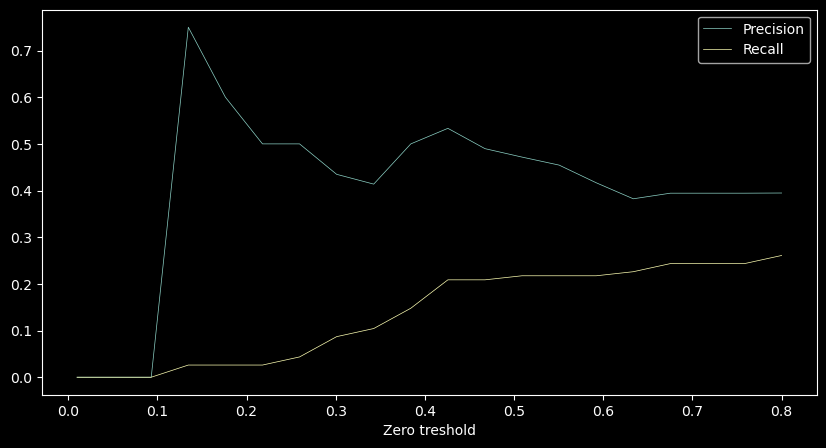

In [ ]:
    fl = int(0.02 * Fs)
    zero = np.linspace(0.01, 0.8, 20)
    precision["zero"] = []
    recall["zero"] = []
    for v in range(len(volume)):
        grouped_frames = tools.extract_vowels(
            words,
            audio,
            Fs,
            fl,
            add_context=False,
            long_frame=True,
            vol_thr=50,
            print_info=False,
            zero_thr=zero[v],
        )
        starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
            grouped_frames, print_info=False
        )
        p, r = tools.score_vs_labels(
            starts_all,
            stops_all,
            labels_df,
            vowels=vowels_all,
            accept_partial=True,
            print_info=False,
        )
        precision["zero"].append(p)
        recall["zero"].append(r)

    plt.figure(figsize=(10, 5))
    plt.plot(zero, precision["zero"])
    plt.plot(zero, recall["zero"])
    plt.legend(("Precision", "Recall"))
    plt.xlabel("Zero treshold")

## Optimize frame length

In [ ]:
frame_length = np.int32(np.linspace(0.01, 0.1, 20) * Fs)
precision["fl"] = []
recall["fl"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl=frame_length[v],
        add_context=False,
        long_frame=True,
        vol_thr=50,
        print_info=False,
        zero_thr=0.3,
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
        grouped_frames, print_info=False
    )
    p, r = tools.score_vs_labels(
        starts_all,
        stops_all,
        labels_df,
        vowels=vowels_all,
        accept_partial=True,
        print_info=False,
    )
    precision["fl"].append(p)
    recall["fl"].append(r)

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\peakutils\peak.py:43: RuntimeWarning: invalid value encountered in scalar add
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(frame_length / Fs, precision["fl"])
plt.plot(frame_length / Fs, recall["fl"])
plt.legend(("Precision", "Recall"))
plt.xlabel("Frame length [s]")

NameError: name 'frame_length' is not defined

<Figure size 1000x500 with 0 Axes>

## Optimize white noise

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: Runti

Text(0.5, 0, 'White threshold')

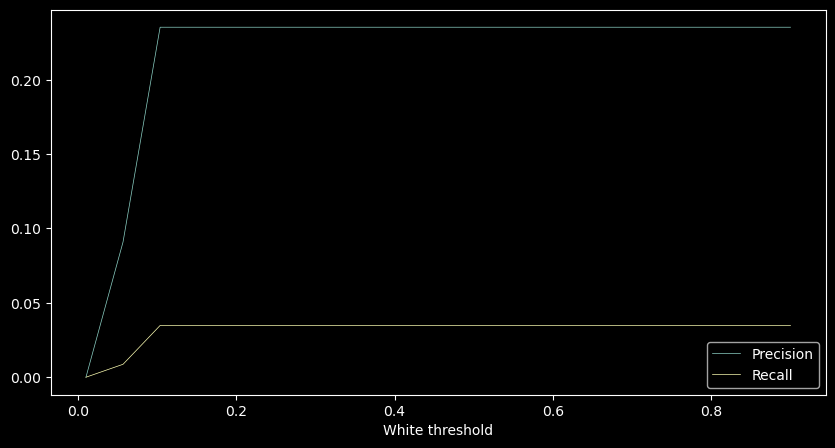

In [ ]:
white = np.linspace(0.01, 0.9, 20)
precision["white"] = []
recall["white"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl=int(0.03 * Fs),
        add_context=False,
        long_frame=True,
        vol_thr=50,
        print_info=False,
        zero_thr=0.3,
        white_thr=white[v],
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
        grouped_frames, print_info=False
    )
    p, r = tools.score_vs_labels(
        starts_all,
        stops_all,
        labels_df,
        vowels=vowels_all,
        accept_partial=True,
        print_info=False,
    )
    precision["white"].append(p)
    recall["white"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(white, precision["white"])
plt.plot(white, recall["white"])
plt.legend(("Precision", "Recall"))
plt.xlabel("White threshold")

## optimize peak height

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-pac

Text(0.5, 0, 'Height factor')

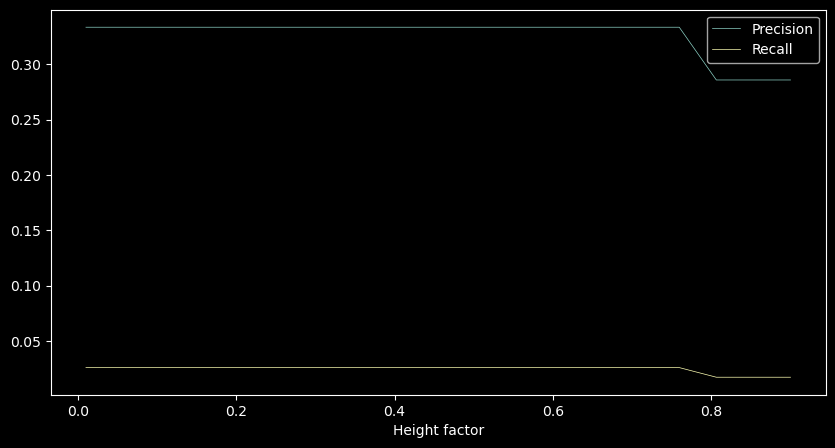

In [ ]:
reload(tools)
height = np.linspace(0.01, 0.9, 20)
precision["height"] = []
recall["height"] = []
for hf in height:
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl=int(0.03 * Fs),
        long_frame=True,
        height_factor=hf,
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
        grouped_frames, print_info=False
    )
    p, r = tools.score_vs_labels(
        starts_all,
        stops_all,
        labels_df,
        vowels=vowels_all,
        accept_partial=True,
        print_info=False,
    )
    precision["height"].append(p)
    recall["height"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(height, precision["height"])
plt.plot(height, recall["height"])
plt.legend(("Precision", "Recall"))
plt.xlabel("Height factor")

## optimize min peak distance

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-pac

Text(0.5, 0, 'min distance factor')

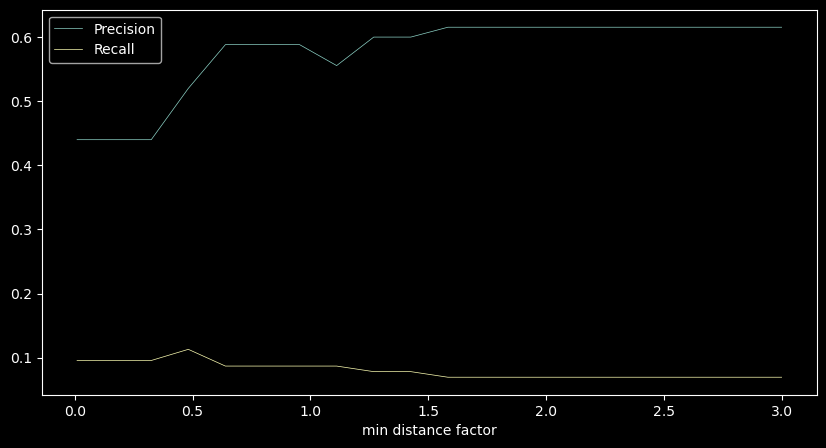

In [ ]:
reload(tools)
distance = np.linspace(0.01, 3, 20)
precision["distance"] = []
recall["distance"] = []
for dist in distance:
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl=int(0.03 * Fs),
        long_frame=True,
        min_distance=dist,
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
        grouped_frames, print_info=False
    )
    p, r = tools.score_vs_labels(
        starts_all,
        stops_all,
        labels_df,
        vowels=vowels_all,
        accept_partial=True,
        print_info=False,
    )
    precision["distance"].append(p)
    recall["distance"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(distance, precision["distance"])
plt.plot(distance, recall["distance"])
plt.legend(("Precision", "Recall"))
plt.xlabel("min distance factor")

# 2D optimization

## Optimize zero-threshold and frame length together

In [ ]:
nbr = 20
zeros = np.linspace(0.1, 0.4, 20)
frames_len = np.int32(np.linspace(0.01, 0.1, 20) * Fs)
precision["zero_fl"] = np.zeros((len(zeros), len(frames_len)))
recall["zero_fl"] = np.zeros((len(zeros), len(frames_len)))

for row in range(len(zeros)):
    for col in range(len(frames_len)):
        grouped_frames = tools.extract_vowels(
            words,
            audio,
            Fs,
            fl=frames_len[col],
            add_context=False,
            long_frame=True,
            vol_thr=50,
            print_info=False,
            zero_thr=zeros[row],
            white_thr=0.8,
        )
        starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
            grouped_frames, print_info=False
        )
        p, r = tools.score_vs_labels(
            starts_all,
            stops_all,
            labels_df,
            vowels=vowels_all,
            accept_partial=True,
            print_info=False,
        )
        precision["zero_fl"][row][col] = p
        recall["zero_fl"][row][col] = r

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\peakutils\peak.py:43: RuntimeWarning: invalid value encountered in scalar add
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\peakutils\peak.py:43:

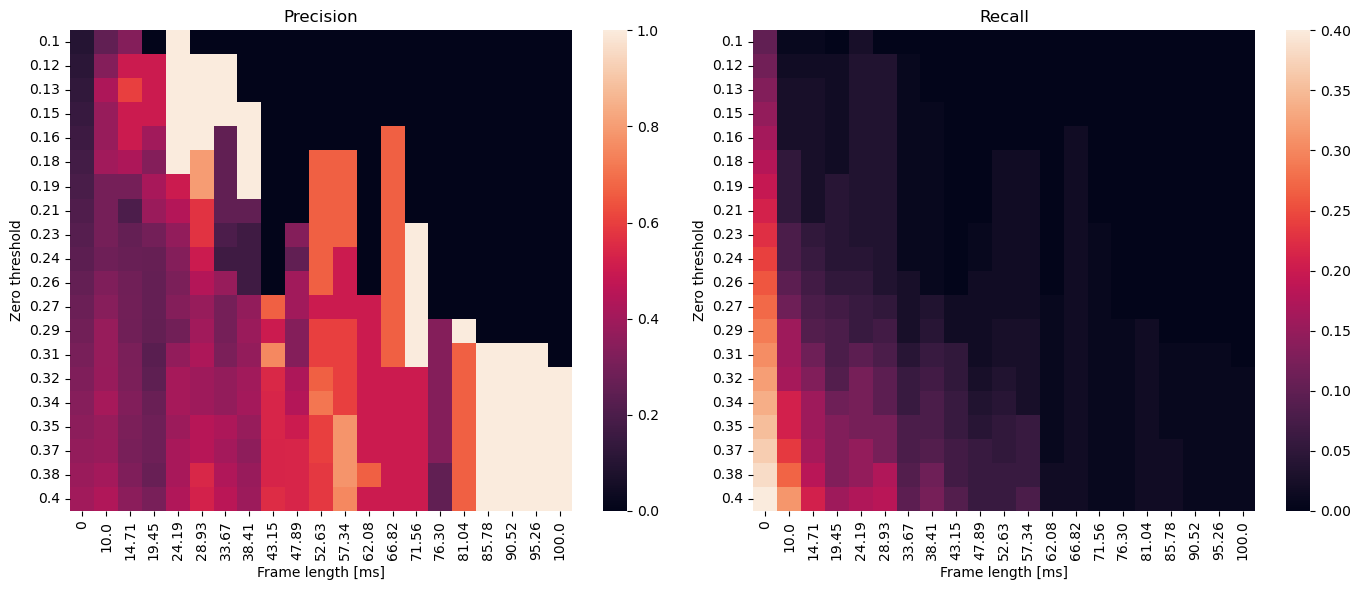

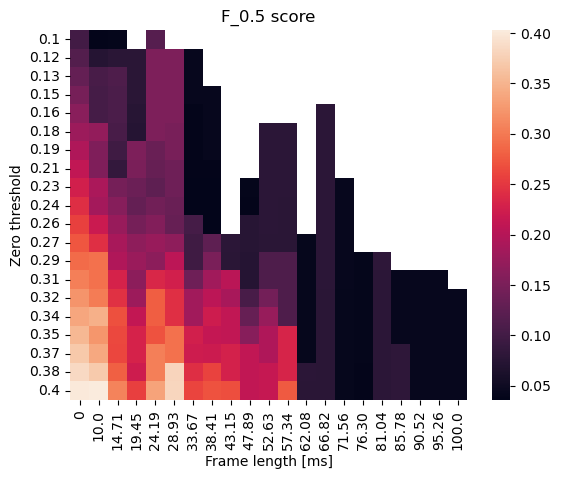

In [ ]:
# pd_precision = pd.DataFrame(
#     precision["zero_fl"], columns=frames_len / Fs * 1000, index=zeros
# )
# pd_recall = pd.DataFrame(recall["zero_fl"], columns=frames_len / Fs * 1000, index=zeros)

zeros = np.linspace(0.1, 0.4, 20)

# load and format for plotting
pd_precision = pd.read_csv("optimize/precision_matrix.csv")
pd_recall = pd.read_csv("optimize/recall_matrix.csv")
pd_precision.set_index(np.round(zeros, 2), inplace=True)
pd_recall.set_index(np.round(zeros, 2), inplace=True)
pd_precision.columns = [x[:5] for x in pd_precision.columns]
pd_recall.columns = [x[:5] for x in pd_recall.columns]

plt.style.use("default")

plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.heatmap(pd_precision, annot=False)
plt.xlabel("Frame length [ms]")
plt.ylabel("Zero threshold")
plt.title("Precision")

plt.subplot(122)
sns.heatmap(pd_recall, annot=False)
plt.xlabel("Frame length [ms]")
plt.ylabel("Zero threshold")
plt.title("Recall")
plt.tight_layout()

plt.savefig("figures/opti_pr_zt_fl_light.eps", dpi=600)
plt.show()

# pd.DataFrame.to_csv(pd_precision, "optimize/precision_matrix.csv")
# pd.DataFrame.to_csv(pd_recall, "optimize/recall_matrix.csv")


def F_beta(p, r, beta):
    return (1 + beta**2) * (p * r) / (beta**2 * p + r)


BETA = 0.5

pd_Fscore = F_beta(pd_precision, pd_recall, BETA)

plt.figure()
sns.heatmap(pd_Fscore, annot=False)
plt.xlabel("Frame length [ms]")
plt.ylabel("Zero threshold")
plt.title(f"F_{BETA} score")
plt.savefig("figures/opti_f05_zt_fl_light.eps", dpi=600)

## optimize zero thr and zero thr 2

In [ ]:
reload(tools)
nbr = 20
thrs = np.linspace(0.01, 0.9, nbr)

precision["zz"] = np.zeros((nbr, nbr))
recall["zz"] = np.zeros((nbr, nbr))

for row in range(nbr):
    for col in range(nbr):
        grouped_frames = tools.extract_vowels(
            words,
            audio,
            Fs,
            fl=int(0.03 * Fs),
            long_frame=True,
            zero_thr=thrs[row],
            zero_thr_2=thrs[col],
        )
        starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(
            grouped_frames, print_info=False
        )
        p, r = tools.score_vs_labels(
            starts_all,
            stops_all,
            labels_df,
            vowels=vowels_all,
            accept_partial=True,
            print_info=False,
        )
        precision["zz"][row][col] = p
        recall["zz"][row][col] = r

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-pac

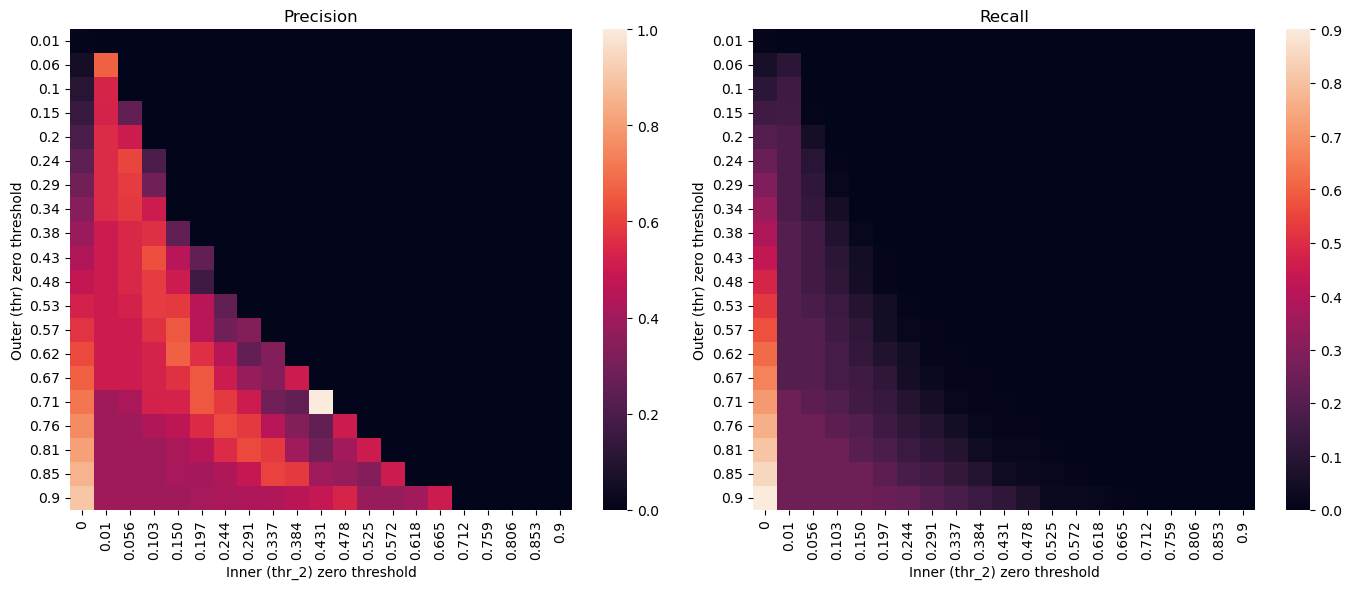

Text(0.5, 1.0, 'F_0.5 score')

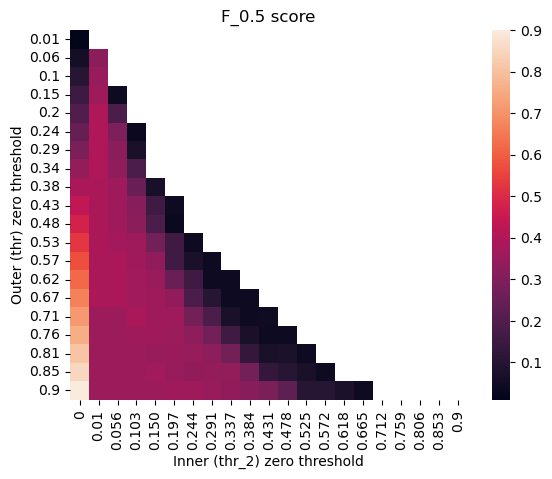

In [ ]:
# pd_precision = pd.DataFrame(precision["zz"], columns=thrs, index=thrs)
# pd_recall = pd.DataFrame(recall["zz"], columns=thrs, index=thrs)
thrs = np.linspace(0.01, 0.9, 20)

# load and format for plotting
pd_precision = pd.read_csv("optimize/precision_matrix_zz.csv")
pd_recall = pd.read_csv("optimize/recall_matrix_zz.csv")
pd_precision.set_index(np.round(thrs, 2), inplace=True)
pd_recall.set_index(np.round(thrs, 2), inplace=True)
pd_precision.columns = [x[:5] for x in pd_precision.columns]
pd_recall.columns = [x[:5] for x in pd_recall.columns]


plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.heatmap(pd_precision, annot=False)
plt.xlabel("Inner (thr_2) zero threshold")
plt.ylabel("Outer (thr) zero threshold")
plt.title("Precision")

plt.subplot(122)
sns.heatmap(pd_recall, annot=False)
plt.xlabel("Inner (thr_2) zero threshold")
plt.ylabel("Outer (thr) zero threshold")
plt.title("Recall")
plt.tight_layout()
plt.savefig("figures/opti_pr_zt1_zt2_light.eps")
plt.show()

# pd.DataFrame.to_csv(pd_precision, "optimize/precision_matrix_zz.csv")
# pd.DataFrame.to_csv(pd_recall, "optimize/recall_matrix_zz.csv")


def F_beta(p, r, beta):
    return (1 + beta**2) * (p * r) / (beta**2 * p + r)


BETA = 0.5

pd_Fscore = F_beta(pd_precision, pd_recall, BETA)

plt.figure()
sns.heatmap(pd_Fscore, annot=False)
plt.xlabel("Inner (thr_2) zero threshold")
plt.ylabel("Outer (thr) zero threshold")
plt.title(f"F_{BETA} score")